In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [2]:
# Load the TIFF file
tiff_file_path = '/home/jovyan/Dev/deafrica-sandbox-notebooks/Use_cases/Vegetated_wetlands_mapping/results/prediction_1995.tif'
tiff_data = tf.imread(tiff_file_path)
output_dir = '/home/jovyan/Dev/deafrica-sandbox-notebooks/Use_cases/Vegetated_wetlands_mapping/results/Maps'

In [3]:
# Split the file path by the last "\"
file_parts = tiff_file_path.split("/")

# Get the last part of the file path
last_part = file_parts[-1]
name = last_part[:-4]
Title = name[-4:]

In [4]:
print(last_part)

prediction_1995.tif


In [5]:
print(name)

prediction_1995


In [6]:
print(Title)

1995


In [7]:
# Define class colors (you can add more if needed)
class_colors = {
    #0:[227, 226, 226],
    1: [245,122,122],       # Background
    2: [20,115,122],     # Class 1
    3: [76,230,0],
    4: [255,255,115],
    5: [0,92,230],
    6: [178,178,178],
    7: [115,0,0],# Class 2
    8: [190,255,232],
    9: [230,230,0],# Class 3
    # Add more classes as needed
}

In [8]:
# Map class IDs to colors
colored_data = np.zeros((tiff_data.shape[0], tiff_data.shape[1], 3), dtype=np.uint8)
for class_id, color in class_colors.items():
    mask = tiff_data == class_id
    colored_data[mask] = color

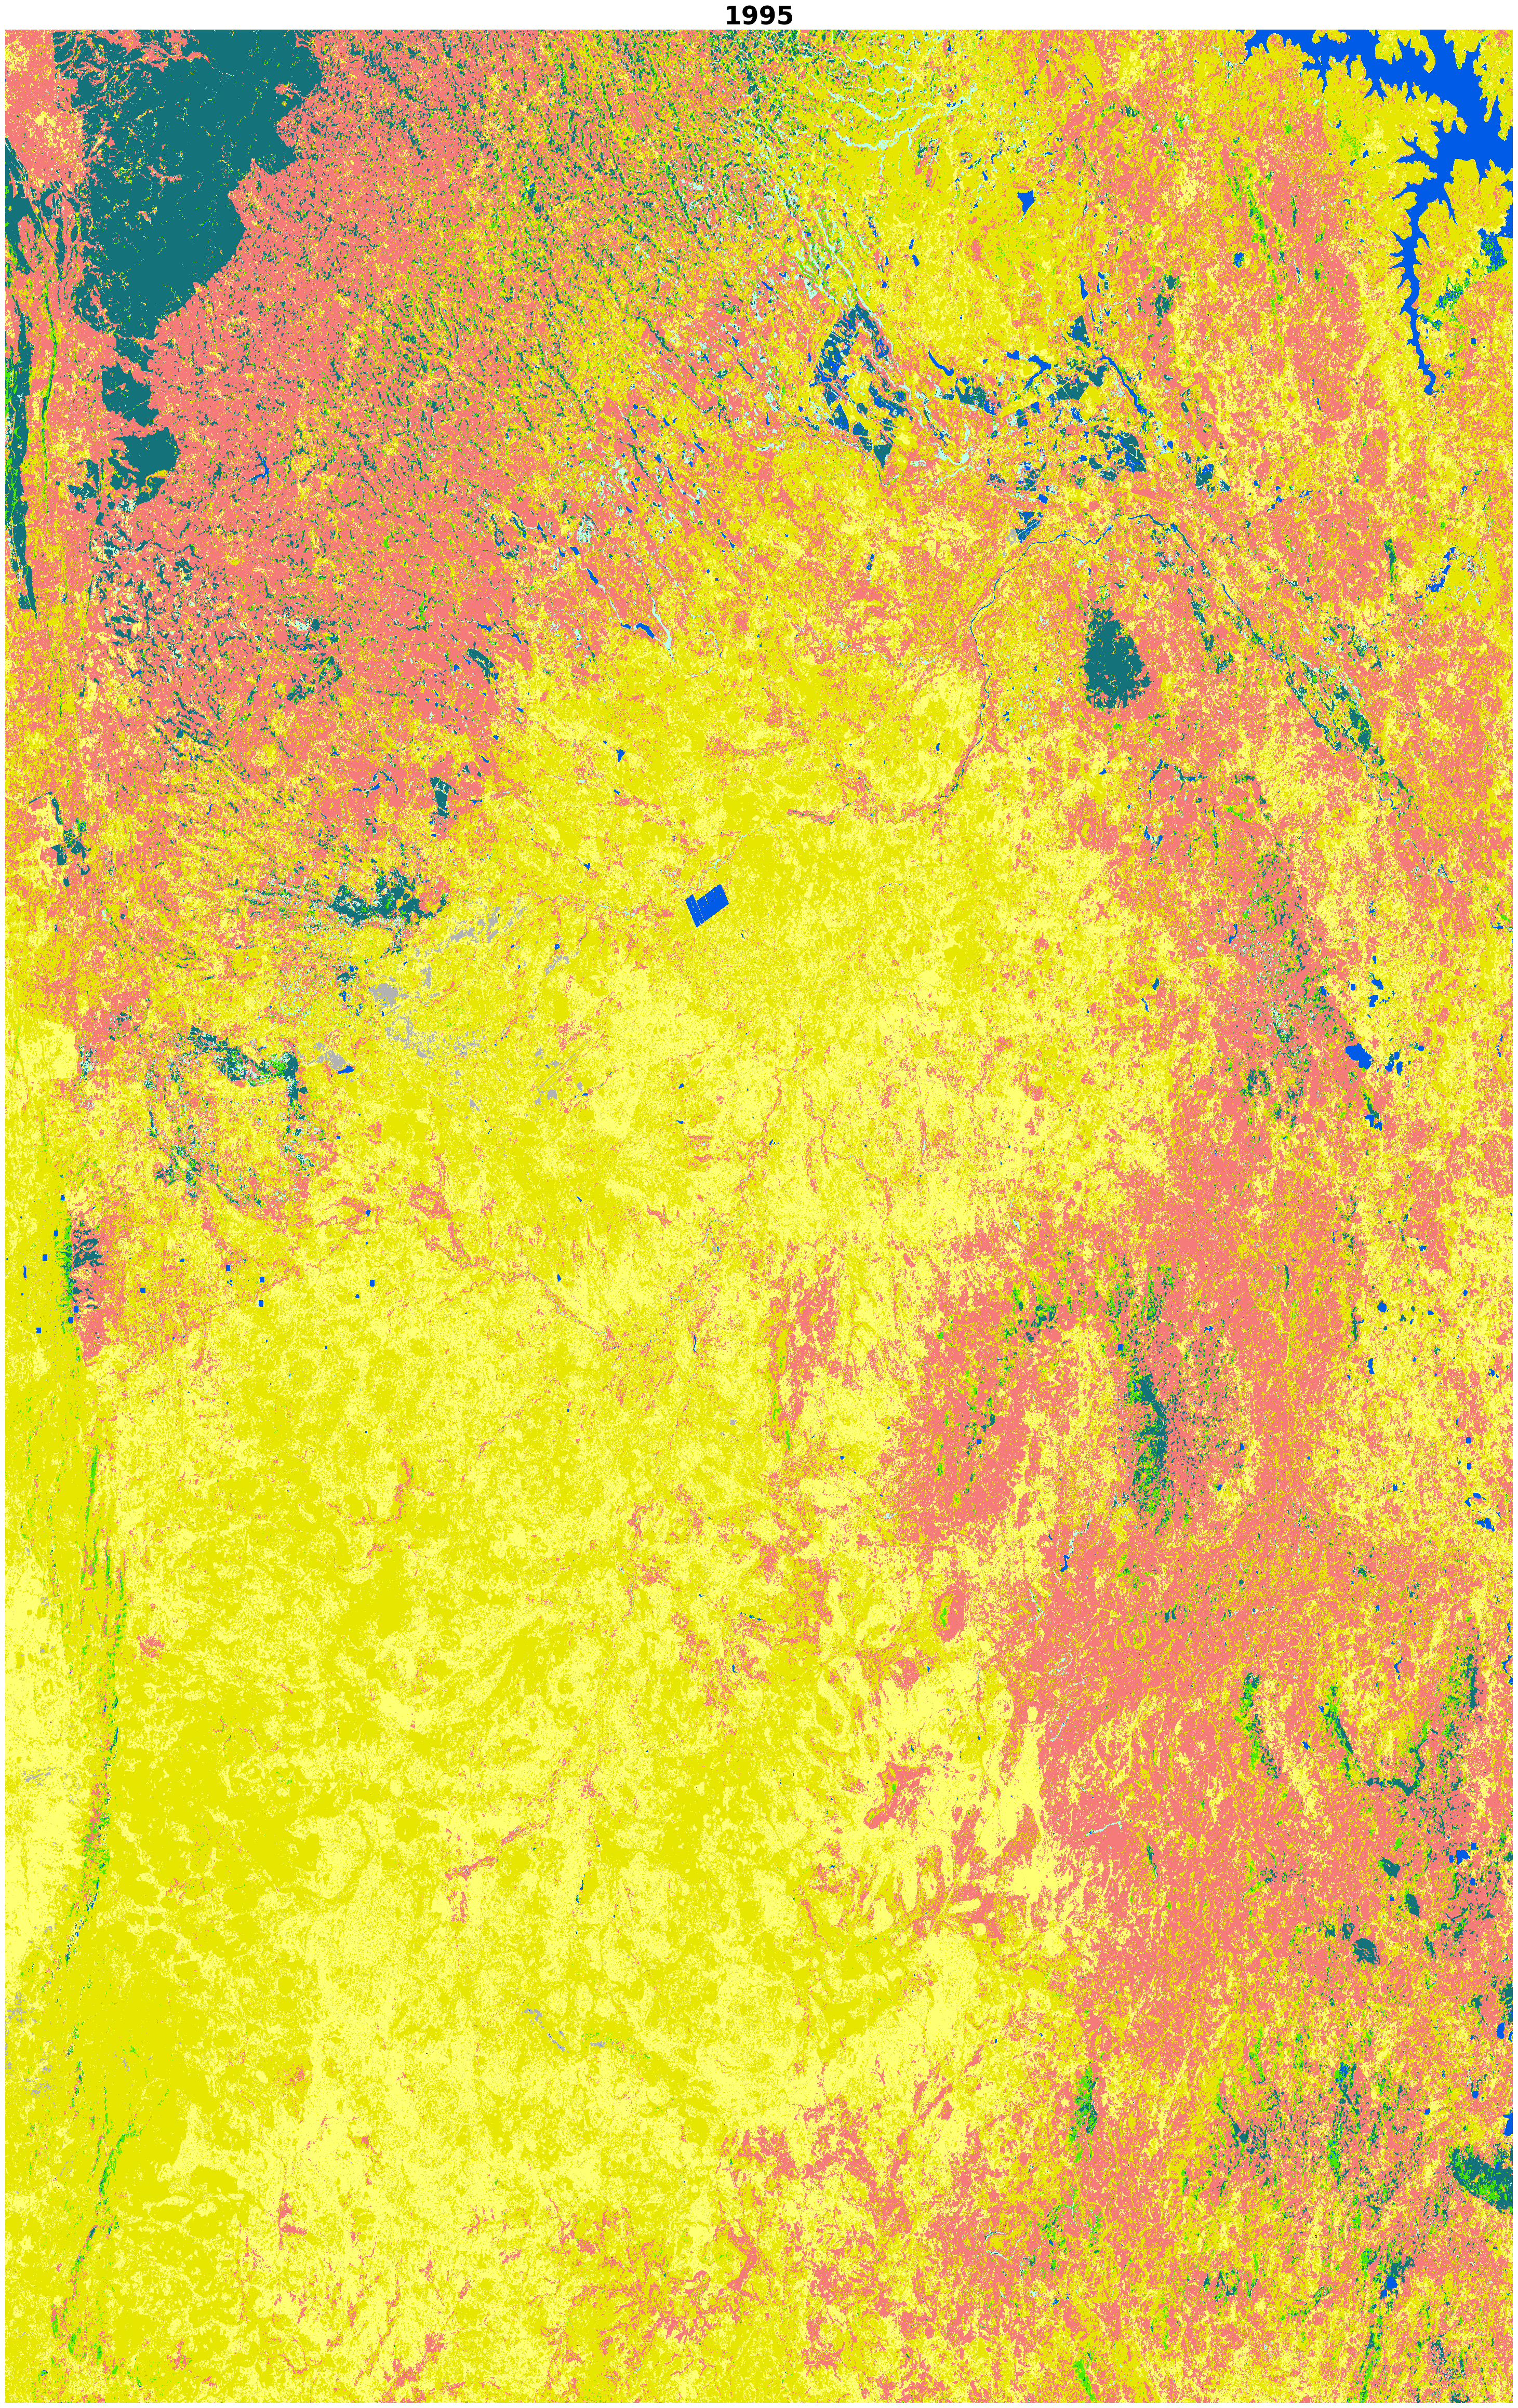

In [9]:
# Create a figure without distorting extents
fig = plt.figure(figsize=(tiff_data.shape[1] / 500, tiff_data.shape[0] / 500), dpi=100)


ax = fig.add_axes([1, 1, 5, 5])


ax.imshow(colored_data)



title_text = Title
ax.set_title(title_text, fontsize=35, fontweight='bold')

ax.axis('off')
ax.facecolor = 'none'
#plt.savefig('/home/jovyan/Dev/deafrica-sandbox-notebooks/Use_cases/Vegetated_wetlands_mapping/results/output.jpg',dpi=100)
#

plt.savefig(f"{output_dir}/{name}.jpg", dpi=100, bbox_inches='tight', pad_inches=0.3)
